# Como criar uma estrategia de trading com python
## Indicador usado: RSI
### Estrategia:
Vamos comprar a acao sempre que o RSI for menor do que 30.
sera que da dinheiro?

# Passo a Passo
    * Passo 1: Escolher um ativo
    * Passo 2: Puxar os dados de cotacao no yahooo finance
    * Passo 3: Calcular os retornos positivos e negativos
    * Passo 4: Separar os retornos positivos e negativos
    * Passo 5: Calcular a media dos retornos positivos e negativos nos ultimos 22 dias
    * Passo 6: Calcular RSI
    * Passo 7: Gerar os sinais de compra ou vendas    
    * Passo 8: Observando pontos de compra ao logo do tempo
    * Passo 9: Calculando lucros
    * Passo 10: Analizando os lucros
        * Qual a media de lucros?
        * Qual a media de perdas?
        * Qual a % de operacoes vencedorar?
        * Qual a expectativa matematica do modelo?
        * Qual retorno acumulado?
        * O retorno acumulado venceu o Buy and Hold na acao?
        
 ### Formula RSI:

100 - 100/(1 + mediaRetornosPositivos / mediaRetornosNegativos)

In [67]:
# INTALANDO AS LIB Q SERAM UTILIZADA 
# EXERCUTE SOMENTE UMA VEZ DE POIS COMENTE O CODIGO!

#!pip install pandas
#!pip install yfinance
#!pip install matplotlib
#!pip install numpy

In [68]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 

pd.options.mode.chained_assignment = None

# Passo 1: Escolher um ativo

In [69]:
ativo = 'PETR4.SA'

# Passo 2: Puxar os dados do yohoo Finance

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

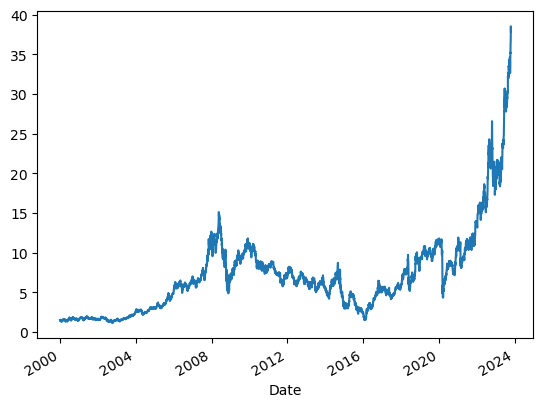

In [70]:
dados_ativo = yf.download(ativo)
dados_ativo['Adj Close'].plot()

# Passo 3: Calcular os retornos 

In [71]:
dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna()
dados_ativo


,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.506321,35389440000,NaN
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.422993,28861440000,-0.055319
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.408635,43033600000,-0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.403763,34055680000,-0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.410173,20912640000,0.004566
...,...,...,...,...,...,...,...
2023-10-16,36.400002,36.799999,35.959999,36.680000,36.680000,49626600,0.011025
2023-10-17,36.700001,37.669998,36.630001,37.669998,37.669998,68814800,0.026990
2023-10-18,37.990002,38.610001,37.910000,38.520000,38.520000,85931700,0.022564


# Passo 4: Separar os retornos positivos dos negativos

In [72]:
retorno = -1
filtrando_retorno = lambda x: x if x > 0 else 0

filtrando_retorno(retorno)

0

In [73]:
dados_ativo['retornos_positivo'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivo,retornos_negativos
Date,,,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.506321,35389440000,NaN,0.000000,0.000000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.422993,28861440000,-0.055319,0.000000,0.055319
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.408635,43033600000,-0.010090,0.000000,0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.403763,34055680000,-0.003458,0.000000,0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.410173,20912640000,0.004566,0.004566,0.000000
...,...,...,...,...,...,...,...,...,...
2023-10-16,36.400002,36.799999,35.959999,36.680000,36.680000,49626600,0.011025,0.011025,0.000000
2023-10-17,36.700001,37.669998,36.630001,37.669998,37.669998,68814800,0.026990,0.026990,0.000000
2023-10-18,37.990002,38.610001,37.910000,38.520000,38.520000,85931700,0.022564,0.022564,0.000000


# Passo 5: Calcular a media de retornos positivos e negativos dos ultimos 22 dias


In [74]:
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivo'].rolling(window = 22).mean()   
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(window = 22).mean()

dados_ativo = dados_ativo.dropna()

dados_ativo


,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivo,retornos_negativos,media_retornos_positivos,media_retornos_negativos
Date,,,,,,,,,,,
2000-02-01,5.200000,5.200000,5.200000,5.200000,1.333255,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878
2000-02-02,5.300000,5.300000,5.300000,5.300000,1.358894,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878
2000-02-03,5.450000,5.450000,5.450000,5.450000,1.397353,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364
2000-02-04,5.588000,5.588000,5.588000,5.588000,1.432736,21199360000,0.025321,0.025321,0.000000,0.006801,0.005905
2000-02-07,5.625000,5.625000,5.625000,5.625000,1.442222,20613120000,0.006621,0.006621,0.000000,0.007101,0.005748
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,36.400002,36.799999,35.959999,36.680000,36.680000,49626600,0.011025,0.011025,0.000000,0.009596,0.004648
2023-10-17,36.700001,37.669998,36.630001,37.669998,37.669998,68814800,0.026990,0.026990,0.000000,0.009667,0.004648
2023-10-18,37.990002,38.610001,37.910000,38.520000,38.520000,85931700,0.022564,0.022564,0.000000,0.010666,0.004648


# Passo 6: Calcular o RSI

## Formular RSI:
100 - 100/(1 + mediaRetornosPositivos / mediaRetornosNegativos)

In [75]:
dados_ativo['RSI'] = (100 - 100 / 
                      (1 + dados_ativo['media_retornos_positivos']/ dados_ativo['media_retornos_negativos']))
dados_ativo.head(50)

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivo,retornos_negativos,media_retornos_positivos,media_retornos_negativos,RSI
Date,,,,,,,,,,,,
2000-02-01,5.200,5.200,5.200,5.200,1.333255,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878,28.211052
2000-02-02,5.300,5.300,5.300,5.300,1.358894,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878,32.950144
2000-02-03,5.450,5.450,5.450,5.450,1.397353,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364,47.026822
2000-02-04,5.588,5.588,5.588,5.588,1.432736,21199360000,0.025321,0.025321,0.000000,0.006801,0.005905,53.522998
2000-02-07,5.625,5.625,5.625,5.625,1.442222,20613120000,0.006621,0.006621,0.000000,0.007101,0.005748,55.266351
2000-02-08,5.750,5.750,5.750,5.750,1.474272,31498240000,0.022222,0.022222,0.000000,0.007904,0.005748,57.896026
2000-02-09,5.625,5.625,5.625,5.625,1.442222,15600640000,-0.021739,0.000000,0.021739,0.006970,0.006736,50.853338
2000-02-10,5.463,5.463,5.463,5.463,1.400687,18600960000,-0.028800,0.000000,0.028800,0.006970,0.006928,50.152453
2000-02-11,5.288,5.288,5.288,5.288,1.355817,25297920000,-0.032034,0.000000,0.032034,0.006904,0.008384,45.159100


# Passo 7: Sinais de compra ou venda

In [76]:
dados_ativo.loc[dados_ativo['RSI'] < 30, 'compra'] = 'sim'
dados_ativo.loc[dados_ativo['RSI'] > 30, 'compra'] = 'nao' 


In [77]:
datas_compra = []
datas_vendas = []


for i in range(len(dados_ativo)):
    
    if 'sim' in dados_ativo['compra'].iloc[i]:
        datas_compra.append(dados_ativo.iloc[i+1].name)
        
datas_compra

[Timestamp('2000-02-02 00:00:00'),
 Timestamp('2000-08-04 00:00:00'),
 Timestamp('2000-12-07 00:00:00'),
 Timestamp('2000-12-08 00:00:00'),
 Timestamp('2000-12-22 00:00:00'),
 Timestamp('2000-12-25 00:00:00'),
 Timestamp('2001-03-19 00:00:00'),
 Timestamp('2001-03-20 00:00:00'),
 Timestamp('2001-03-21 00:00:00'),
 Timestamp('2001-03-23 00:00:00'),
 Timestamp('2001-03-27 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-05 00:00:00'),
 Timestamp('2001-07-05 00:00:00'),
 Timestamp('2001-07-06 00:00:00'),
 Timestamp('2001-07-09 00:00:00'),
 Timestamp('2002-06-20 00:00:00'),
 Timestamp('2002-06-21 00:00:00'),
 Timestamp('2002-06-24 00:00:00'),
 Timestamp('2002-06-25 00:00:00'),
 Timestamp('2002-06-26 00:00:00'),
 Timestamp('2002-07-29 00:00:00'),
 Timestamp('2002-07-30 00:00:00'),
 Timestamp('2002-07-31 00:00:00'),
 Timestamp('2002-10-14 00:00:00'),
 Timestamp('2002-10-15 00:00:00'),
 Timestamp('2002-10-16 00:00:00'),
 Timestamp('2002-10-

# A gente vai ter 2 stops de venda:
    * RSI acima de 40
    * 10 dias de operacao

In [78]:
datas_compra = []
datas_vendas = []


for i in range(len(dados_ativo)):
    
    if 'sim' in dados_ativo['compra'].iloc[i]:
        datas_compra.append(dados_ativo.iloc[i+1].name)
        for j in range(1, 11):
            if dados_ativo['RSI'].iloc[i + j] > 40:
                datas_vendas.append(dados_ativo.iloc[i + j + 1].name)
                break
            elif j == 10:
                datas_vendas.append(dados_ativo.iloc[i + j + 1].name)
                
datas_vendas

[Timestamp('2000-02-04 00:00:00'),
 Timestamp('2000-08-11 00:00:00'),
 Timestamp('2000-12-15 00:00:00'),
 Timestamp('2000-12-15 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2001-04-02 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-06 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2002-07-04 00:00:00'),
 Timestamp('2002-07-05 00:00:00'),
 Timestamp('2002-07-08 00:00:00'),
 Timestamp('2002-07-09 00:00:00'),
 Timestamp('2002-07-10 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-

# Passo 8: Observando pontos de compra ao logo dos tempo

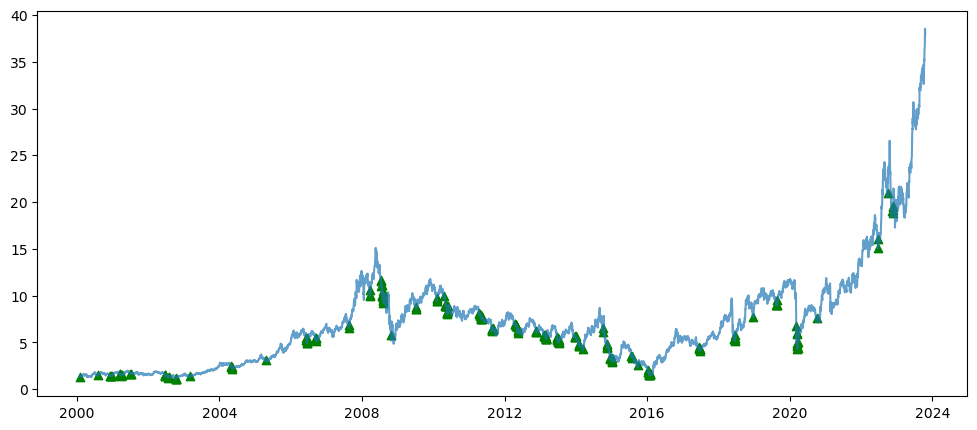

In [79]:
plt.figure(figsize=(12,5))
plt.scatter(dados_ativo.loc[datas_compra].index, dados_ativo.loc[datas_compra]['Adj Close'], marker = '^', c = 'g')       
plt.plot(dados_ativo['Adj Close'], alpha = 0.7)

# Passo 9 : Calculando lucros

In [81]:
lucros = dados_ativo.loc[datas_vendas]['Open'].values/dados_ativo.loc[datas_compra]['Open'].values -1

lucros

array([ 5.43395509e-02,  7.31183124e-02,  5.10998253e-02,  3.52297721e-02,
        2.41610290e-02,  1.73333062e-02, -1.30560927e-01, -1.23781649e-01,
       -6.84104924e-02,  4.76386364e-02,  5.88598601e-02,  1.44605114e-01,
        1.11231136e-01,  5.00000156e-02,  3.25670639e-02,  3.65384909e-02,
        3.25670639e-02, -3.30595603e-02,  1.08225106e-02,  7.12962491e-02,
        2.52796655e-02, -1.04925411e-02,  7.35181707e-02,  6.83544497e-02,
        4.22326257e-02,  9.19219804e-02,  8.43706531e-02,  1.13636361e-01,
        5.86011897e-02,  3.25570074e-02, -5.80002382e-02, -4.60526316e-02,
        1.44769674e-04,  2.11368670e-02,  1.64893942e-02, -4.46818878e-02,
       -1.18061091e-02,  4.90666707e-02,  6.75712831e-02,  7.78082234e-02,
       -6.81647194e-03, -2.86419715e-02, -4.51128567e-02, -5.85210426e-02,
        3.40478795e-02,  3.01507735e-02,  6.56619846e-02,  5.29674913e-02,
        1.27529396e-01,  1.08011377e-01,  8.32167405e-02, -9.50113054e-02,
       -1.54171910e-01, -

# Passo 10: Analizando os lucros
    * Qual a media de lucros?
    * Qual a media de perdas?
    * Qual a % de operacoes vencedorar?
    * Qual a expectativa matematica do modelo?
    * Qual retorno acumulado?
    * O retorno acumulado venceu o Buy and Hold na acao?

In [82]:
operacoes_vencedoras = len(lucros[lucros > 0]) / len(lucros)

operacoes_vencedoras

0.5836909871244635

In [85]:
media_ganhos = np.mean(lucros[lucros > 0])

media_ganhos * 100

6.902665217758821

In [86]:
media_perdas = abs(np.mean(lucros[lucros < 0]))

media_perdas * 100 

5.939926153741871

In [87]:
expectativa_matematica_modelo = (operacoes_vencedoras  * media_ganhos) - ((1 - operacoes_vencedoras) * media_perdas)     
expectativa_matematica_modelo * 100


1.5561786811254852

In [90]:
performance_acumulada = (np.cumprod((1 + lucros)) - 1) 
performance_acumulada * 100

array([ 5.43395509e+00,  1.31431080e+01,  1.89247010e+01,  2.31143911e+01,
        2.60889615e+01,  2.82745001e+01,  1.15268625e+01, -2.27811640e+00,
       -8.96331858e+00, -4.62645521e+00,  9.87218289e-01,  1.55904865e+01,
        2.84477477e+01,  3.48701371e+01,  3.92624615e+01,  4.43509016e+01,
        4.90519867e+01,  4.41243936e+01,  4.56841813e+01,  5.60709170e+01,
        6.00163376e+01,  5.83373596e+01,  6.99780326e+01,  8.15967875e+01,
        8.92660967e+01,  1.06663811e+02,  1.24100172e+02,  1.49566100e+02,
        1.64190970e+02,  1.72792238e+02,  1.56970223e+02,  1.45136068e+02,
        1.45171556e+02,  1.50353715e+02,  1.54481896e+02,  1.43111164e+02,
        1.40240967e+02,  1.52028792e+02,  1.69058701e+02,  1.89993680e+02,
        1.88016946e+02,  1.79767573e+02,  1.67146459e+02,  1.51512769e+02,
        1.60076246e+02,  1.67917746e+02,  1.85509757e+02,  2.00632492e+02,
        2.38971972e+02,  2.75584802e+02,  3.06839745e+02,  2.68185370e+02,
        2.11421528e+02,  

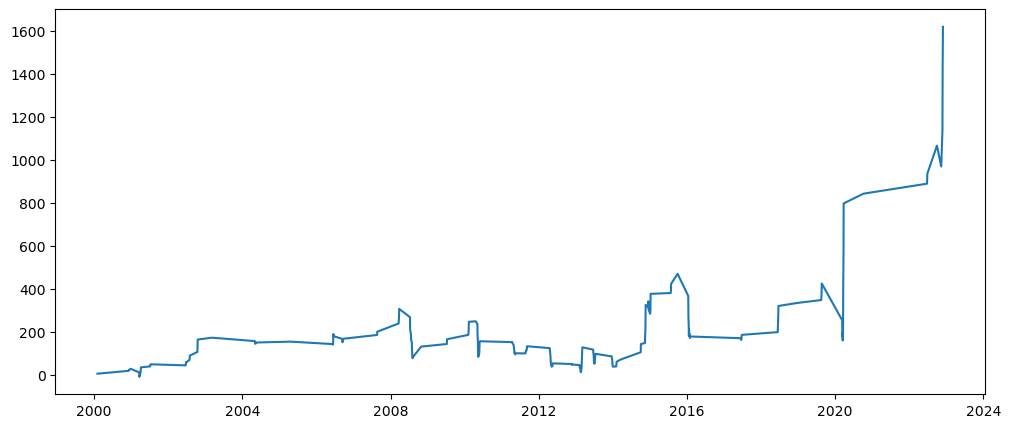

In [89]:
plt.figure(figsize = (12,5))
plt.plot(datas_compra, performance_acumulada)